In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

## Analyse descriptive du jeu de données

In [39]:
df = pd.read_csv('donnees-synop.csv', sep=';', encoding='utf-8')
#/home/jovyan/work/

In [4]:
df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,81401,2021-04-06T17:00:00+02:00,101160.0,40.0,8.0,60.0,3.3,304.05,297.95,70.0,...,5,Saint-Laurent-du-Maroni,97311,CC de l'Ouest Guyanais,249730037.0,Guyane,973,Guyane,3.0,4
1,7314,2021-04-06T20:00:00+02:00,102160.0,20.0,3.0,340.0,7.2,281.55,268.75,40.0,...,11,Saint-Denis-d'Oléron,17323,CC de l'Île d'Oléron,241700624.0,Charente-Maritime,17,Nouvelle-Aquitaine,75.0,4
2,7650,2021-04-06T20:00:00+02:00,101040.0,160.0,3.0,320.0,16.8,282.45,267.75,35.0,...,9,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807.0,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93.0,4
3,7558,2021-04-06T23:00:00+02:00,101820.0,230.0,1.0,360.0,8.7,272.75,264.35,53.0,...,712,Millau,12145,CC de Millau Grands Causses,241200567.0,Aveyron,12,Occitanie,76.0,4
4,7591,2021-04-06T23:00:00+02:00,NaN,370.0,1.0,20.0,0.9,273.25,262.15,43.0,...,871,Embrun,05046,CC Serre-Ponçon,200067742.0,Hautes-Alpes,05,Provence-Alpes-Côte d'Azur,93.0,4


In [9]:
df.shape

(171947, 82)

In [ ]:
df.describe(include='all')

In [ ]:
df.iloc[:, 0:7].describe(include='all')

In [ ]:
df.iloc[:, 8:16].describe(include='all')

In [ ]:
df.iloc[:, 17:25].describe(include='all')

In [ ]:
df.iloc[:, 26:34].describe(include='all')

In [ ]:
df.iloc[:, 35:42].describe(include='all')

In [ ]:
df.iloc[:, 43:51].describe(include='all')

In [ ]:
df.iloc[:, 52:60].describe(include='all')

In [ ]:
df.iloc[:, 61:69].describe(include='all')

In [ ]:
df.iloc[:, 70:78].describe(include='all')

In [ ]:
df.iloc[:, 79:82].describe(include='all')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

## Model Predictif 

Visualisation seaborn pour la correlation des variables 

In [11]:
!pip install matplotlib

In [12]:
!pip install seaborn

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# sns.pairplot(df)
# plt.show()

In [14]:
!pip install scipy

In [15]:
from scipy.stats import pearsonr

## Heatmap

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df = pd.read_csv('donnees-synop.csv', sep=';', encoding='utf-8')

In [ ]:
# Calculer la corrélation entre chaque variable et la température
correlation_with_temperature = df.corr()['Température (°C)']

# Créer un DataFrame à partir des corrélations
correlation_df = pd.DataFrame(correlation_with_temperature)
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['Variable', 'Correlation with Temperature']

# Tracer un graphique de barres des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='Correlation with Temperature', y='Variable', color='skyblue')
plt.title('Corrélation avec la Température (°C)')
plt.xlabel('Corrélation')
plt.ylabel('Variable')
plt.show()

In [ ]:
type(df['Température (°C)']) 

In [ ]:
df['Température (°C)'].dtype

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [ ]:
# Sélectionner les colonnes numériques dans le DataFrame
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
colonnes_numeriques = df[colonnes_numeriques]

In [ ]:
# Calculer les corrélations et les p-values pour chaque paire de colonnes
#resultats_correlation = pd.DataFrame(columns=['Variable', 'Corrélation avec Température (°C)', 'p-value'])
#for colonne in df_numerique.columns:
#   if colonne != 'Température (°C)':  # Exclure la colonne 'Température (°C)'
#        correlation, p_value = pearsonr(df_numerique[colonne][mask[colonne]], df['Température (°C)'][mask[colonne]])
#        resultats_correlation = resultats_correlation.append({'Variable': colonne, 'Corrélation avec Température (°C)': correlation, 'p-value': p_value}, ignore_index=True)

# Afficher les résultats
#print(resultats_correlation)

In [ ]:
# colonnes_qualitatives = ['ID OMM station', 'Date','Niveau barométrique', 'Coordonnees', 'Nom', 'Type de tendance barométrique', 
#                        'Temps passé 1','Temps passé 2', 'Temps présent', 'communes (name)', 'communes (code)', 'EPCI (name)', 
#                       'EPCI (code)', 'department (name)', 'Phénomène spécial 1', 'Phénomène spécial 2', 
#                        'Phénomène spécial 3', 'Phénomène spécial 4', 'department (code)', 'region (name)', 
#                        'region (code)', 'mois_de_l_annee', 'Méthode de mesure Température du thermomètre mouillé', 
#                       'Température du thermomètre mouillé', 'Type de tendance barométrique.1', 'Temps passé 1.1', 
#                       'Temps présent.1', 'Hauteur de base 4', 'Type nuage 4', 'Type nuage 3', 'Type nuage 2', 'Type nuage 3' ]

# Exclure les colonnes qualitatives du DataFrame
# df.drop(columns=colonnes_qualitatives).isna().sum()

In [40]:

# A tester à ce niveau

# Listez les colonnes que vous souhaitez conserver
colonnes_a_garder = ['Température (°C)', 'Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude']

# Utilisez la méthode drop pour supprimer les colonnes qui ne sont pas dans la liste
df = df.drop(columns=[colonne for colonne in df.columns if colonne not in colonnes_a_garder])

In [41]:
df.isna().sum()

Point de rosée      3004
Humidité            2981
Température (°C)    2904
Latitude               0
Longitude              0
Altitude               0
dtype: int64

In [42]:
# Calculer la moyenne de la colonne "Température (°C)"
temperature_mean = df['Température (°C)'].mean()
humidite_mean = df['Humidité'].mean()
point_rosee = df['Point de rosée'].mean()

# A CORRIGER CHANGEMENT DE LA TEMPÉRATURE AVEC LES VALEURS ADÉQUAT
# Remplacer les valeurs NaN par la moyenne
# df['Température (°C)'].fillna(temperature_mean, inplace=True)
df.fillna({'Température (°C)':temperature_mean}, inplace=True)
df.fillna({'Humidité':humidite_mean}, inplace=True)
df.fillna({'Point de rosée':point_rosee}, inplace=True)


In [43]:
df.isna().sum()

Point de rosée      0
Humidité            0
Température (°C)    0
Latitude            0
Longitude           0
Altitude            0
dtype: int64

In [20]:
from scipy.stats import pearsonr

# Calculer le coefficient de corrélation et la p-value pour chaque colonne numérique par rapport à la température
correlation_with_temperature = {}
p_values = {}
for colonne in df.columns:
    if colonne != 'Température (°C)':
        correlation, p_value = pearsonr(df[colonne], df['Température (°C)'])
        correlation_with_temperature[colonne] = correlation
        p_values[colonne] = p_value
        

# Créer un DataFrame pour stocker les résultats
resultats_correlation = pd.DataFrame({
    'Variable': list(correlation_with_temperature.keys()),
    'Corrélation avec Température (°C)': list(correlation_with_temperature.values()),
    'p-value': list(p_values.values())
})
resultats_correlation['p-value'] = resultats_correlation['p-value'].apply(lambda x: '{:.4f}'.format(x))
# Afficher les résultats
print(resultats_correlation)


         Variable  Corrélation avec Température (°C) p-value
0  Point de rosée                           0.918825  0.0000
1        Humidité                          -0.225743  0.0000
2        Latitude                          -0.140598  0.0000
3       Longitude                          -0.398829  0.0000
4        Altitude                          -0.250658  0.0000


In [ ]:

# Charger le DataFrame
df = pd.read_csv('donnees-synop.csv', sep=';', encoding='utf-8')
# Listez les colonnes que vous souhaitez conserver
colonnes_a_inclure = ['Température (°C)', 'Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude',
                     'Variation de pression en 3 heures', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn']



# Supprimer les colonnes qui ne sont pas dans la liste
colonnes_a_supprimer = [colonne for colonne in df.columns if colonne not in colonnes_a_inclure]
df.drop(columns=colonnes_a_supprimer, inplace=True)

# Remplacer les valeurs NaN par la moyenne pour les variables numériques
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
for colonne in colonnes_numeriques:
    moyenne_colonne = df[colonne].mean()
    df.fillna({colonne : moyenne_colonne}, inplace=True)

# Créer une liste pour stocker les résultats de corrélation
correlation_list = []

# Calculer les corrélations et les p-values pour chaque variable
for colonne in df.columns:
    if colonne != 'Température (°C)':  # Exclure la colonne 'Température (°C)'
        correlation, p_value = pearsonr(df[colonne], df['Température (°C)'])
        correlation_list.append({'Variable': colonne, 
                                 'Corrélation avec Température (°C)': correlation, 
                                 'p-value': p_value})

# Créer un DataFrame à partir de la liste de résultats de corrélation
resultats_correlation = pd.DataFrame(correlation_list)

# Afficher les résultats
print(resultats_correlation)

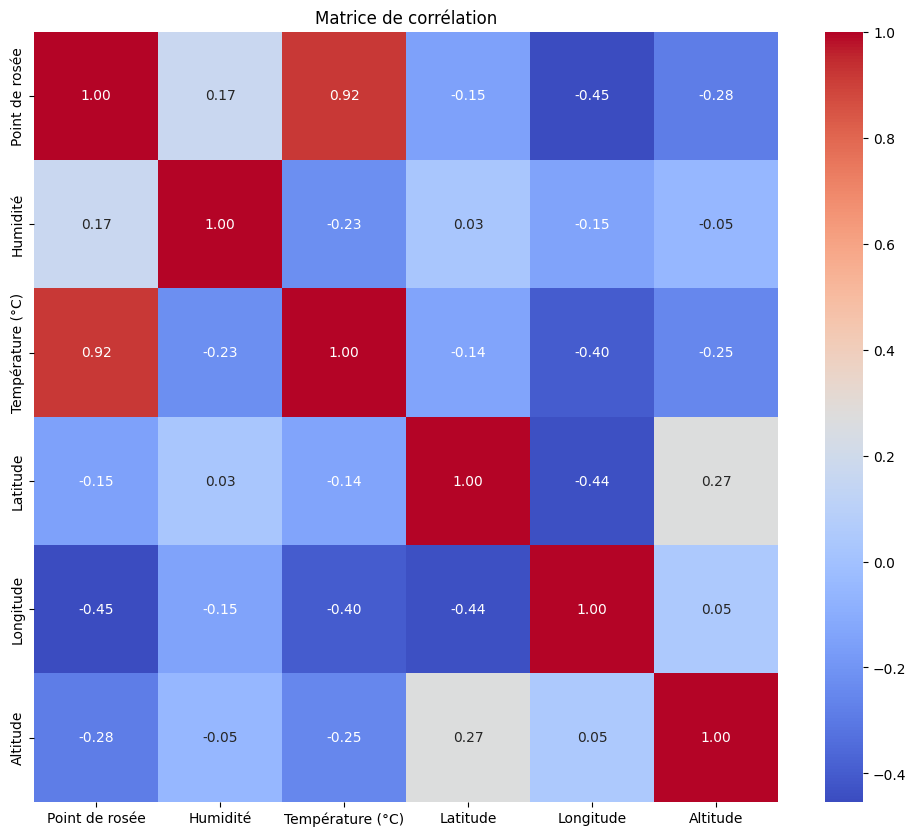

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de corrélation')

# Afficher le heatmap
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


# Sélectionnez les colonnes indépendantes
X = df[['Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude']]

# Spécifiez la variable dépendante
y = df['Température (°C)']

# Spécifiez le degré du polynôme
degree = 2  # Choisir le degré de polynôme souhaité

# Créez et entraînez le modèle de régression polynomiale
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Extraire les coefficients du modèle
coefficients = model.named_steps['linearregression'].coef_[:5]  # Garder uniquement les 5 premiers coefficients
intercept = model.named_steps['linearregression'].intercept_

# Afficher l'équation du modèle
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], start=1):
    equation += f" + {coef:.2f} * X{i}^{i}"
print(f"Équation du modèle pour un polynôme de degré {degree}:", equation)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
X = df[['Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude']]
y = df['Température (°C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
degrees = [1, 2, 3, 4, 5]
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, train_r2_scores, label='Ensemble d\'entraînement')
plt.plot(degrees, test_r2_scores, label='Ensemble de test')
plt.xlabel('Degré du polynôme')
plt.ylabel('R²')
plt.title('Performance du modèle (R²)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, train_rmse_scores, label='Ensemble d\'entraînement')
plt.plot(degrees, test_rmse_scores, label='Ensemble de test')
plt.xlabel('Degré du polynôme')
plt.ylabel('RMSE')
plt.title('Performance du modèle (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install statsmodels

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [44]:
df['Température (°C)']
df[['Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude']]


# Renommer les colonnes 'Humidité', 'Point de rosée', 'Latitude', 'Longitude', 'Altitude'
nouveaux_noms = {'Humidité': 'Humidite', 'Point de rosée': 'Point_de_rosee', 'Latitude': 'Latitude', 
                 'Longitude': 'Longitude', 'Altitude': 'Altitude', 'Température (°C)':'Temperature_C'}
df.rename(columns=nouveaux_noms, inplace=True)


In [45]:
reg = smf.ols('Temperature_C ~ Humidite + Point_de_rosee + Latitude+ Longitude', data = df)

In [46]:
res = reg.fit()

In [27]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Temperature_C   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.933e+06
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:05:42   Log-Likelihood:            -1.7798e+05
No. Observations:              171947   AIC:                         3.560e+05
Df Residuals:                  171942   BIC:                         3.560e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -261.2065      0.066  -3928.

In [47]:
#paramètres estimés Beta chap
print('paramètres :\n',res.params,'\n')
#degrés de liberté du modèle
print('degrés de liberté :\n',res.df_model,'\n')

paramètres :
 Intercept        -261.206516
Humidite           -0.227818
Point_de_rosee      1.034573
Latitude            0.005755
Longitude          -0.000104
dtype: float64 

degrés de liberté :
 4.0 



In [ ]:
# Ecriture du calcul
# res.params[0]+res.params[1]*70+res.params[2]*297.95+res.params[3]*5  #Exemple de Calcul (1er ligne de la matrice)

In [48]:
# Extraction des valeurs prédites pour Y.
Y_chap = res.fittedvalues # OU res.predict()
print(Y_chap)

0         31.134312
1          7.987310
2          8.076123
3          0.461998
4          0.466330
            ...    
171942    21.585802
171943    16.896168
171944    15.293096
171945    18.123991
171946    13.183019
Length: 171947, dtype: float64


In [49]:
# calcul du vecteur Epsilon
# valeurs réelles - valeurs prédites
Y = df['Temperature_C']
eps = Y-Y_chap
print(eps)

0        -0.234312
1         0.412690
2         1.223877
3        -0.861998
4        -0.366330
            ...   
171942    0.214198
171943    0.203832
171944   -0.093096
171945   -0.423991
171946    0.016981
Length: 171947, dtype: float64


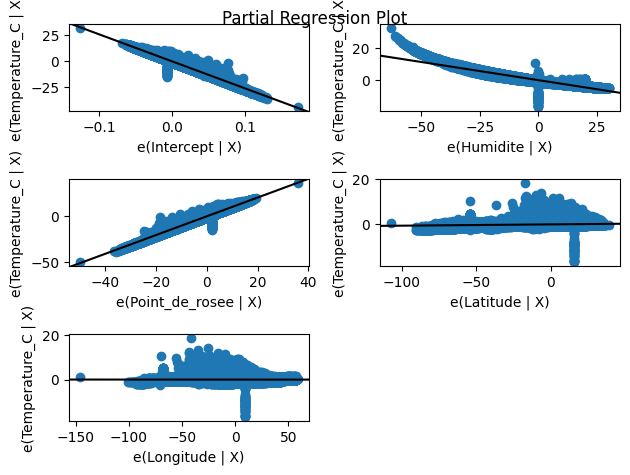

In [50]:
fig = sm.graphics.plot_partregress_grid(res)
# ou fig = sm.graphics.plot_ccpr(res, "Humidite") si on souhaite en obsever un en particulier

In [36]:
#SCR
print('SCR :',res.ssr,'\n')
#SCE
print('SCE :',res.ess,'\n')
#SCT
print('SCT :',res.centered_tss,'\n')
#le R2
print('R2 :',res.rsquared,'\n')
#le R2 ajusté
print('R2 ajusté :',res.rsquared_adj,'\n')
# SCR divisé par le nombre de degrés de liberté des résidus.
print('mse_resid :',res.mse_resid,'\n')
# SCT divisé par somme des degrés de liberté des paramètres et des résidus
print('mse_total :',res.mse_total,'\n')
#calcul manuel de la statistique F à partir des carrés moyens
F = res.mse_model / res.mse_resid
print('calcul manuel du F :',F,'\n')
#la statistique F fourni par l'objet res
print('F fourni :',res.fvalue)
print('P-value : ', res.pvalues)

SCR : 79794.40955334908 

SCE : 14725497.89117913 

SCT : 14805292.300732478 

R2 : 0.994610413091986 

R2 ajusté : 0.9946102877104757 

mse_resid : 0.46407747701753543 

mse_total : 86.10431356782058 

calcul manuel du F : 7932672.140121291 

F fourni : 7932672.140121291
P-value :  Intercept         0.000000
Humidite          0.000000
Point_de_rosee    0.000000
Latitude          0.000000
Longitude         0.105681
dtype: float64


Le test de Fisher indique que le modèle est très performant pour expliquer la variance (la tendance) des données, avec un coefficient de détermination élevé 0.9946  et des valeurs de SCR, SCE et SCT assez faible. Par contre le coefficient de Longitude n'est pas significatif dans notre modèle ce qui indique que le jeu de données n'est pas assez exhaustif pour cette variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = df[['Humidite', 'Point_de_rosee', 'Latitude', 'Longitude', 'Altitude']]
y = df['Temperature_C']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création des caractéristiques polynomiales
degree = 2  # Degré du polynôme
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_poly)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne:", mse)

In [ ]:

# Colonnes qualitatives à exclure
# colonnes_qualitatives = ['ID OMM station', 'Date','Niveau barométrique', 'Coordonnees', 'Nom', 'Type de tendance barométrique', 
                        'Temps passé 1','Temps passé 2', 'Temps présent', 'communes (name)', 'communes (code)', 'EPCI (name)', 
                        'EPCI (code)', 'department (name)', 'Phénomène spécial 1', 'Phénomène spécial 2', 
                        'Phénomène spécial 3', 'Phénomène spécial 4', 'department (code)', 'region (name)', 
                        'region (code)', 'mois_de_l_annee', 'Méthode de mesure Température du thermomètre mouillé', 
                        'Température du thermomètre mouillé', 'Type de tendance barométrique.1', 'Temps passé 1.1', 
                        'Temps présent.1', 'Hauteur de base 4', 'Type nuage 4', 'Type nuage 3', 'Type nuage 2', 'Type nuage 3' ]

# Exclure les colonnes qualitatives du DataFrame
#df_numerique = df.drop(columns=colonnes_qualitatives)

# Exclure les valeurs infinies et NaN
# mask = np.isfinite(df_numerique) & np.isfinite(df['Température (°C)'])

# Calculer les corrélations et les p-values pour chaque paire de colonnes
resultats_correlation = pd.DataFrame(columns=['Variable', 'Corrélation avec Température (°C)', 'p-value'])
for colonne in df_numerique.columns:
    if colonne != 'Température (°C)':  # Exclure la colonne 'Température (°C)'
        correlation, p_value = pearsonr(df_numerique[colonne][mask[colonne]], df['Température (°C)'][mask[colonne]])
        resultats_correlation = resultats_correlation.append({'Variable': colonne, 'Corrélation avec Température (°C)': correlation, 'p-value': p_value}, ignore_index=True)

# Afficher les résultats


# Colonnes qualitatives à exclure
# colonnes_qualitatives = ['ID OMM station', 'Date','Niveau barométrique', 'Coordonnees', 'Nom', 'Type de tendance barométrique', 
                        'Temps passé 1','Temps passé 2', 'Temps présent', 'communes (name)', 'communes (code)', 'EPCI (name)', 
                        'EPCI (code)', 'department (name)', 'Phénomène spécial 1', 'Phénomène spécial 2', 
                        'Phénomène spécial 3', 'Phénomène spécial 4', 'department (code)', 'region (name)', 
                        'region (code)', 'mois_de_l_annee', 'Méthode de mesure Température du thermomètre mouillé', 
                        'Température du thermomètre mouillé', 'Type de tendance barométrique.1', 'Temps passé 1.1', 
                        'Temps présent.1', 'Hauteur de base 4', 'Type nuage 4', 'Type nuage 3', 'Type nuage 2', 'Type nuage 3' ]

# Exclure les colonnes qualitatives du DataFrame
#df_numerique = df.drop(columns=colonnes_qualitatives)

# Exclure les valeurs infinies et NaN
# mask = np.isfinite(df_numerique) & np.isfinite(df['Température (°C)'])

# Calculer les corrélations et les p-values pour chaque paire de colonnes
resultats_correlation = pd.DataFrame(columns=['Variable', 'Corrélation avec Température (°C)', 'p-value'])
for colonne in df_numerique.columns:
    if colonne != 'Température (°C)':  # Exclure la colonne 'Température (°C)'
        correlation, p_value = pearsonr(df_numerique[colonne][mask[colonne]], df['Température (°C)'][mask[colonne]])
        resultats_correlation = resultats_correlation.append({'Variable': colonne, 'Corrélation avec Température (°C)': correlation, 'p-value': p_value}, ignore_index=True)

resultats_correlation

